In [1]:
using AA222
using PyPlot
using JuMP # Julia Math Programming Package

INFO: Loading help data...


# Example

maximize $f = 2x_1 + x_2$  
subject to  
$2x_1 - x_2 \leq 8$  
$x_1 + 2x_2 \leq 14$  
$-x_1 + x_2 \leq 4$  
$x_1 \geq 0$  
$x_2 \geq 0$

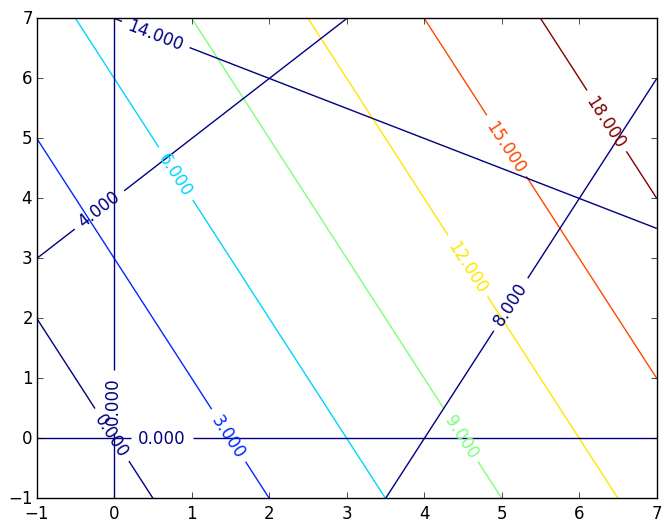

In [2]:
xdom(-1, 7)
ydom(-1, 7)
contour(x -> 2*x[1] + x[2])       # objective
contour(x -> 2*x[1] - x[2], [8])  # constraint 1
contour(x -> x[1] + 2*x[2], [14]) # constraint 2
contour(x -> -x[1] + x[2], [4])   # constraint 3
contour(x -> x[1], [0])
contour(x -> x[2], [0]);

In [3]:
m = Model()
@defVar(m, x1 >= 0)
@defVar(m, x2 >= 0)
setObjective(m, :Max, 2x1 + x2)
@addConstraint(m, 2x1 - x2 <= 8)
@addConstraint(m, x1 + 2x2 <= 14)
@addConstraint(m, -1*x1 + x2 <= 4)
m

Maximization problem with:
 * 3 linear constraints
 * 2 variables
Solver set to Default

In [4]:
status = solve(m)

:Optimal

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 2e+00]
  Objective range [1e+00, 2e+00]
  Bounds range    [0e+00, 0e+00]
  RHS range       [4e+00, 1e+01]
Presolve time: 0.00s
Presolved: 3 rows, 2 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0000000e+30   2.000000e+30   3.000000e+00      0s
       2    1.6000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds
Optimal objective  1.600000000e+01


In [5]:
println("Objective value: ", getObjectiveValue(m))
println("x1 = ", getValue(x1))
println("x2 = ", getValue(x2))

Objective value: 16.0
x1 = 6.0
x2 = 4.0
